In [1]:
import numpy as np
import pandas as pd
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

In [2]:
path = './WDI_csv/WDIData.csv'
RAW_DATA = pd.read_csv(path)

In [3]:
FILLED_DATA = RAW_DATA.iloc[:, 4:].interpolate(axis=1).bfill().ffill().replace(np.nan, 0)

In [4]:
FILLED_DATA = RAW_DATA.iloc[:, [0, 2]].join(FILLED_DATA)

In [5]:
indCount = FILLED_DATA.loc[0:1442, 'Indicator Name'].shape[0]

indCount

1443

In [6]:
ndf = FILLED_DATA.drop([*[str(yr) for yr in range(1960, 2000)], 'Unnamed: 65'], axis=1)

In [7]:
a = [[ndf.loc[i*indCount, 'Country Name'], 
      *ndf.loc[i*indCount:i*indCount+indCount-1, '2010']] 
     for i in range(int(ndf.shape[0]/indCount))]

df = pd.DataFrame(a, columns=['Country Name', 
                       *ndf.loc[:indCount-1, 'Indicator Name']])

df

,Country Name,Access to clean fuels and technologies for cooking (% of population),Access to electricity (% of population),"Access to electricity, rural (% of rural population)","Access to electricity, urban (% of urban population)",Account ownership at a financial institution or with a mobile-money-service provider (% of population ages 15+),"Account ownership at a financial institution or with a mobile-money-service provider, female (% of population ages 15+)","Account ownership at a financial institution or with a mobile-money-service provider, male (% of population ages 15+)","Account ownership at a financial institution or with a mobile-money-service provider, older adults (% of population ages 25+)","Account ownership at a financial institution or with a mobile-money-service provider, poorest 40% (% of population ages 15+)",...,Women who believe a husband is justified in beating his wife (any of five reasons) (%),Women who believe a husband is justified in beating his wife when she argues with him (%),Women who believe a husband is justified in beating his wife when she burns the food (%),Women who believe a husband is justified in beating his wife when she goes out without telling him (%),Women who believe a husband is justified in beating his wife when she neglects the children (%),Women who believe a husband is justified in beating his wife when she refuses sex with him (%),Women who were first married by age 15 (% of women ages 20-24),Women who were first married by age 18 (% of women ages 20-24),Women's share of population ages 15+ living with HIV (%),Young people (ages 15-24) newly infected with HIV
0,Africa Eastern and Southern,15.658101,28.233373,16.241064,62.520824,5.235829,5.235829,5.235829,5.235829,5.235829,...,58.363084,58.363084,58.363084,58.363084,58.363084,58.363084,58.363084,58.363084,58.363084,7.147027
1,Africa Western and Central,7.147027,41.730881,20.552615,74.158184,5.232387,5.232387,5.232387,5.232387,5.232387,...,58.668407,58.668407,58.668407,58.668407,58.668407,58.668407,58.668407,58.668407,58.668407,84.717091
2,Arab World,84.717091,86.065072,73.670292,96.342894,85.433100,85.433100,85.433100,85.433100,85.433100,...,39.634196,39.634196,39.634196,39.634196,39.634196,39.634196,39.634196,39.634196,39.634196,88.078809
3,Caribbean small states,88.078809,93.398309,89.702142,97.128428,90.645840,90.645840,90.645840,90.645840,90.645840,...,49.011497,49.011497,49.011497,49.011497,49.011497,49.011497,49.011497,49.011497,49.011497,99.011290
4,Central Europe and the Baltics,99.011290,100.000000,100.000000,100.000000,94.756660,94.756660,94.756660,94.756660,94.756660,...,46.005661,46.005661,46.005661,46.005661,46.005661,46.005661,46.005661,46.005661,46.005661,46.005661
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Virgin Islands (U.S.),100.000000,100.000000,100.000000,100.000000,9.356177,9.356177,9.356177,9.356177,9.356177,...,99.900000,99.900000,99.900000,99.900000,99.900000,99.900000,99.900000,99.900000,99.900000,99.900000
262,West Bank and Gaza,99.900000,99.900000,99.900000,99.900000,18.966153,18.966153,18.966153,18.966153,18.966153,...,20.600000,20.600000,20.600000,20.600000,20.600000,20.600000,20.600000,20.600000,59.900002,59.900002
263,"Yemen, Rep.",59.900002,60.674675,42.358517,100.000000,13.742200,13.742200,13.742200,13.742200,13.742200,...,10.262500,10.262500,10.262500,10.262500,10.262500,10.262500,10.262500,32.300000,38.400000,200.000000
264,Zambia,15.900000,22.000000,3.959453,49.800000,34.565313,34.565313,34.565313,34.565313,34.565313,...,55.471429,38.985714,28.871429,36.900000,38.528571,33.128571,7.385714,37.228571,60.000000,25000.000000


In [8]:
targets = ['GNI (current US$)']

pd.DataFrame([ndf.loc[ndf.loc[:, 'Indicator Name']==target].iloc[0] for target in targets])

,Country Name,Indicator Name,2000,2001,2002,2003,2004,2005,2006,2007,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
493,Africa Eastern and Southern,GNI (current US$),2.734503e+11,2.483187e+11,2.543656e+11,3.398060e+11,4.236033e+11,4.931133e+11,5.524760e+11,6.298731e+11,...,9.024215e+11,9.159905e+11,9.275131e+11,9.503103e+11,8.913149e+11,8.537421e+11,9.586492e+11,9.856960e+11,9.854681e+11,9.016064e+11


In [10]:
a = [[ndf.loc[i*indCount, 'Country Name'], 
      ndf.loc[i*indCount+493, '2010'],
      ndf.loc[i*indCount+493, '2020']] 
      for i in range(int(ndf.shape[0]/indCount))]
      #*ndf.loc[i*indCount+493:i*indCount+494, ['2010', '2018']], 
      #*ndf.loc[i*indCount+498:i*indCount+499, '2018']] 
      #for i in range(int(ndf.shape[0]/indCount))]

a = pd.DataFrame(a, columns=['Country Name', 'GNI 2010', 'GNI 2020'])
targdf = a.join(pd.DataFrame(100*(a.iloc[:, 2]-a.iloc[:, 1])/a.iloc[:, 1], columns=['GNI % Growth']))
targdf = targdf.replace(np.nan, 0)

targdf

,Country Name,GNI 2010,GNI 2020,GNI % Growth
0,Africa Eastern and Southern,8.092621e+11,9.016064e+11,11.410923
1,Africa Western and Central,5.496154e+11,7.572770e+11,37.783077
2,Arab World,2.271419e+12,2.465056e+12,8.524908
3,Caribbean small states,6.224279e+10,6.320885e+10,1.552074
4,Central Europe and the Baltics,1.270567e+12,1.610585e+12,26.761088
...,...,...,...,...
261,Virgin Islands (U.S.),4.202160e+09,3.460860e+09,-17.640934
262,West Bank and Gaza,1.028060e+10,1.810720e+10,76.129798
263,"Yemen, Rep.",2.908777e+10,2.158954e+10,-25.777952
264,Zambia,1.890256e+10,1.760166e+10,-6.882158


In [42]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler

In [15]:
targdf.loc[:, 'GNI % Growth'].describe()

count    2.660000e+02
mean     5.561419e+08
std      6.757265e+09
min     -9.071173e+01
25%      4.152765e+00
50%      2.725394e+01
75%      5.409001e+01
max      1.022658e+11
Name: GNI % Growth, dtype: float64

In [21]:
(targdf.loc[:, 'GNI % Growth']>30).sum() / targdf.shape[0]

0.47368421052631576

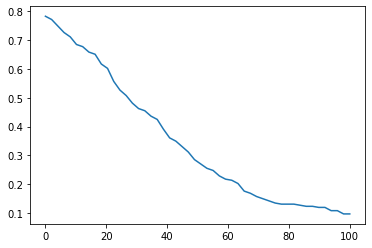

In [24]:
ls = np.linspace(0, 100)
p = []
for th in ls:
    p.append((targdf.loc[:, 'GNI % Growth']>th).sum() / targdf.shape[0])
    
plt.plot(ls, p)

In [37]:
#pd.DataFrame(p, index=ls)

In [38]:
pd.DataFrame(p, index=ls).iloc[[10, 19], :]

,0
20.408163,0.601504
38.775510,0.390977


In [40]:
from sklearn.linear_model import LogisticRegressionCV

In [57]:
from sklearn.preprocessing import StandardScaler

In [58]:
pl = Pipeline([
    ('scaler', StandardScaler()), 
    ('estimator', LogisticRegressionCV(n_jobs=-1))])

In [59]:
X = df.drop('Country Name', axis=1)
y = targdf.loc[:, 'GNI % Growth']>20

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [60]:
pl.fit(X_train, y_train)
pl.score(X_test, y_test)

0.7777777777777778

In [85]:
scores = pl.named_steps['estimator'].scores_[True]

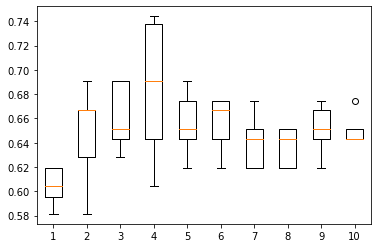

In [86]:
plt.boxplot(scores)
plt.show()

In [110]:
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_validate

In [111]:
scaler = StandardScaler()
X_train_transformed = scaler.fit_transform(X_train)
X_test_transformed = scaler.transform(X_test)

models = {
    'LogisticRegressionCV': LogisticRegressionCV(), 
    'LinearSVC': LinearSVC(), 
    'DecisionTreeClassifier': DecisionTreeClassifier(), 
    'KNeighborsClassifier': KNeighborsClassifier(), 
    'GaussianNB': GaussianNB()}

scores = []
for m in models:
    scores.append(cross_validate(models[m], X_train_transformed, y_train, n_jobs=-1))

In [112]:
plt.boxplot( scores

[{'fit_time': array([2.84110689, 2.77083015, 2.97346306, 3.03584313, 1.12194991]),
  'score_time': array([0.00107121, 0.00115991, 0.00065112, 0.00070977, 0.00052524]),
  'test_score': array([0.6744186 , 0.60465116, 0.64285714, 0.61904762, 0.66666667])},
 {'fit_time': array([0.11990595, 0.11326289, 0.23142505, 0.12877727, 0.1161139 ]),
  'score_time': array([0.00100207, 0.00116205, 0.00057602, 0.0010519 , 0.0005188 ]),
  'test_score': array([0.6744186 , 0.65116279, 0.66666667, 0.69047619, 0.69047619])},
 {'fit_time': array([0.11090112, 0.10757613, 0.11061764, 0.0893209 , 0.07651091]),
  'score_time': array([0.00108695, 0.00095701, 0.00088406, 0.00129986, 0.00058508]),
  'test_score': array([0.60465116, 0.65116279, 0.66666667, 0.73809524, 0.57142857])},
 {'fit_time': array([0.00473976, 0.00476289, 0.00329113, 0.0034709 , 0.00335693]),
  'score_time': array([0.004812  , 0.01415706, 0.00376201, 0.00328422, 0.00353193]),
  'test_score': array([0.65116279, 0.74418605, 0.73809524, 0.66666667,

In [102]:
models

{'LogisticRegressionCV': LogisticRegressionCV(),
 'LinearSVC': LinearSVC(),
 'DecisionTreeClassifier': DecisionTreeClassifier(),
 'KNeighborsClassifier': KNeighborsClassifier(),
 'GaussianNB': GaussianNB()}